In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import talib
# pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc
from matplotlib.pylab import date2num

from vnpy.trader.database import database_manager
from vnpy.trader.constant import Exchange, Interval
from datetime import datetime

# 使用ggplot样式，好看些
mpl.style.use("ggplot")

%matplotlib inline

In [64]:
bars = database_manager.load_bar_data(
    "ETHUSD",
    Exchange.BITMEX,
    interval=Interval.MINUTE,
    start=datetime(2019, 8, 1),
    end=datetime(2019, 9, 1)
)

df = pd.DataFrame(index=[b.datetime for b in bars])
df['open'] = [b.open_price for b in bars]
df['high'] = [b.high_price for b in bars]
df['low'] = [b.low_price for b in bars]
df['close'] = [b.close_price for b in bars]
df['volume'] = [b.volume for b in bars]

# 计算MACD指标数据
df["macd"], df["sigal"], df["hist"] = talib.MACD(df.close)

# 计算移动平均线
df["ma10"] = talib.MA(df.close, timeperiod=10)
df["ma30"] = talib.MA(df.close, timeperiod=30)

# 计算RSI
df["rsi"] = talib.RSI(df.close)

bar_list = []
for ts, row in df.iterrows():
    t = date2num(ts)
    open, high, low, close = row.open, row.high, row.low, row.close
    bar_tuple = (t, open, high, low, close)
    bar_list.append(bar_tuple)


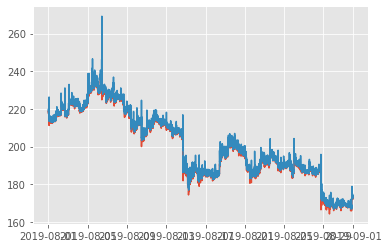

In [79]:
y = talib.TSF(df.close)
std = talib.STDDEV(df.close - y)
up = y + std * 2
lo = y - std * 2

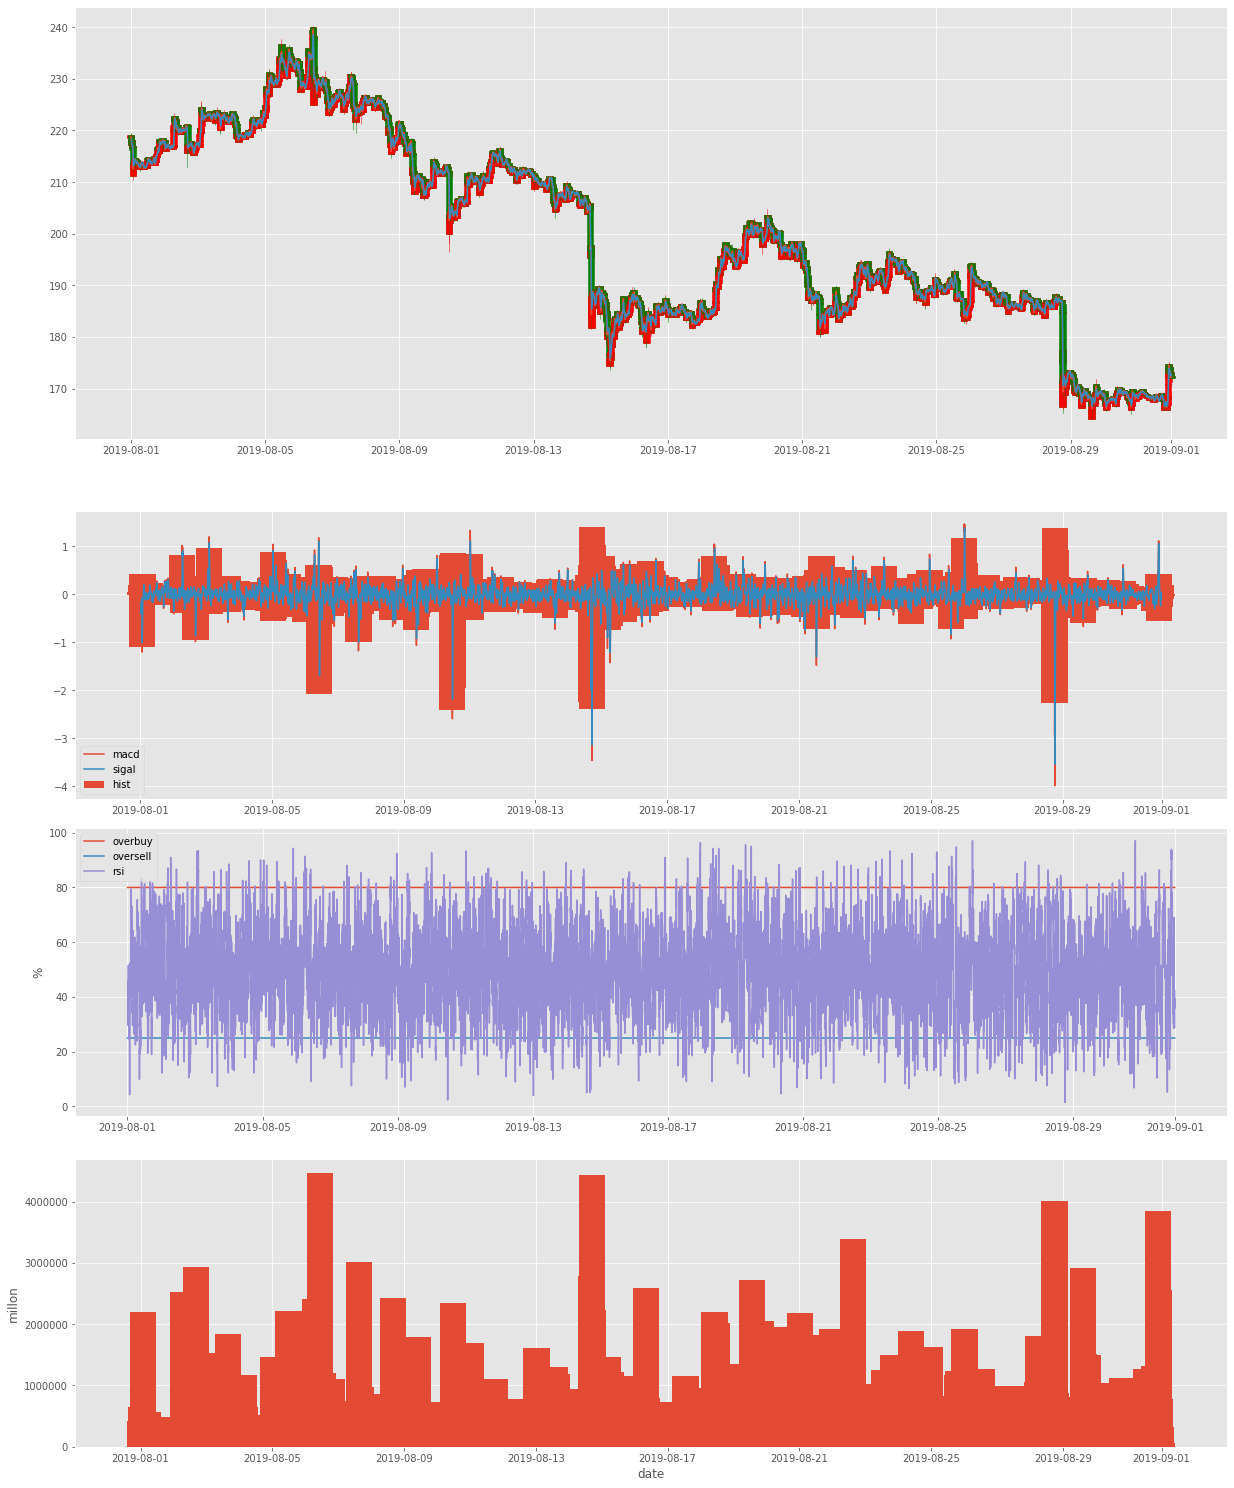

In [10]:
# 绘制第一个图
fig = plt.figure()

ax_canddle = fig.add_axes((0, 0.7, 1, 0.3))
ax_macd = fig.add_axes((0, 0.45, 1, 0.2))
ax_rsi = fig.add_axes((0, 0.23, 1, 0.2))
ax_vol = fig.add_axes((0, 0, 1, 0.2))

# 绘制蜡烛图
candlestick_ohlc(ax_canddle, bar_list, colorup='r', colordown='green')
# 将x轴设置为时间类型
ax_canddle.xaxis_date()
ax_canddle.plot(df.index, df.ma10, label="MA10")
ax_canddle.plot(df.index, df.ma30, label="MA30")

# 将volume除以100w
ax_vol.bar(df.index, df.volume)
# 设置成百万位单位
ax_vol.set_ylabel("millon")
ax_vol.set_xlabel("date")

# 绘制MACD
ax_macd.plot(df.index, df["macd"], label="macd")
ax_macd.plot(df.index, df["sigal"], label="sigal")
ax_macd.bar(df.index, df["hist"] * 2, label="hist")
ax_macd.legend()

# 绘制RSI
# 超过85%设置为超买, 超过25%为超卖
ax_rsi.plot(df.index, [80] * len(df.index), label="overbuy")
ax_rsi.plot(df.index, [25] * len(df.index), label="oversell")
ax_rsi.plot(df.index, df.rsi, label="rsi")
ax_rsi.set_ylabel("%")
ax_rsi.legend()

plt.show()

In [ ]:
# 标记移动平均线买入卖出点
for date, point in data[["ma_point"]].itertuples():
    if math.isnan(point):
        continue
    if point > 0:
        ax_canddle.annotate("",
                    xy=(date, data.loc[date].close),
                    xytext=(date, data.loc[date].close - 10),
                    arrowprops=dict(facecolor="r",
                                    alpha=0.3,
                                    headlength=10,
                                    width=10))
    elif point < 0:
        ax_canddle.annotate("",
                    xy=(date, data.loc[date].close),
                    xytext=(date, data.loc[date].close + 10),
                    arrowprops=dict(facecolor="g",
                                    alpha=0.3,
                                    headlength=10,
                                    width=10))